In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Creating a Synthetic dataset
X, y = make_blobs(random_state=0)

# Splitting data and labels into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)

# Evaluating the model on the test set
print("Test set sscore: {:.2f}".format(logreg.score(X_test, y_test)))

Test set sscore: 0.88


In [2]:
# Cross Validation is a more robust way to assess generalization.
# Methods to evaluate classification and regression performance that go beyond the default measures of accuracy andd R^2 (score method)
# Grid Search, effective method for adjusting the parameters in supervised models for the best generalization performance

## Cross - Validation

In [3]:
# Data is split repeatedly and multiple models are trained
# Commonly used version of cross-validation is k-fold cross validation, where k is a user specified number, usually 5 or 10.

In [4]:
# While performing 5-fold cross validation the data is partitioned into 5 parts of approximately equal sizes called 'FOLDS'. Next a
# sequence of model is trained. The first model is trained using the first fold as the test set and the remaining fold (2-5) as training
# set.

# The model is built using data in folds (2-5) and then the accuracy is evaluated on fold 1. The another model is build using fold 2 as
# testing set and 1,3,4 and 5 as training set.

# This process is repeated using folds 3,4 and 5 as testing set. For each of these five splits of the data into training and testing sets
# we calculated the accuracy. In the end we have collected 5 accuracy values.

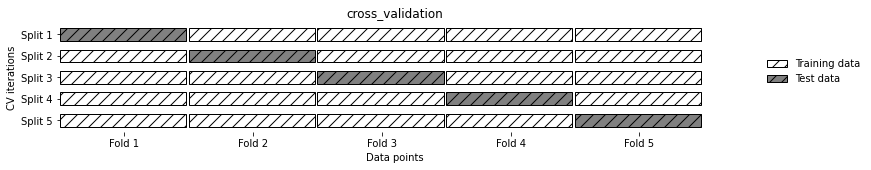

In [5]:
!pip install mglearn
import mglearn

mglearn.plots.plot_cross_validation()

### Cross-Validation in scikit-learn

In [6]:
# Parameters of the 'cross_val_score' function are the modell we want to evaluate, the training data, and the ground-truth labels.

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=142)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [8]:
# By-default cross validation performs five-fold cross validation, returning 5 accuracy values. We can change the folds by changing the
# cv parameter.

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


In [9]:
# Computing the mean of the cross-validation score

print("Average cross-validation socre: {:.2f}".format(scores.mean()))

Average cross-validation socre: 0.97


In [10]:
# We expect the model to be around 97% accurate on average. Looking at the five accuravy score we can see a high variance in the accuracy
# between folds, ranging from 100% to 93%. This implies that the model is very dependent on the particular folds use for training but it
# could also be the consequence of the small size of the dataset.

### Benefits of Cross-Validation



1. Having multiple splits of the data also provides some information about how sensitive our model is to the selection of the training dataset. This shows us the worst case and the best case scenario of the model when applied to a new data
2. We use our data more effectively. When using cross-validation we use 80% of training data and 20% of testing data while in train_test_split we using 75% and 25% dataset respectively. More data will usually result in more accurate models.

### Disadvantage of Cross-Validation



1. Increased Computational Cost. As now we are training **k** models instead of a single model, cross validation will be roughly k times slower than doing a singlee split of the data.



## TIP

Cross validation is not a way to build a model that can be applied to new data. **Cross - Validation does not return a model**.

When calling cross_val_score, multiple model are build internally, but the purpose of cross-validation is only to evaluate how well a given algorithm will generalize when trained on a specific dataset. 